<a href="https://colab.research.google.com/github/jx-dohwan/Aiffel_NLP_Project/blob/main/%5BNLP_02%5DUsing_SentencePiece.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 라이브러리 설치 및 import 

In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-09-22 10:53:53--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-09-22 10:53:53--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf4cd547812a39f1b90468a3ff5.dl.dropboxusercontent.com/cd/0/get/Bta96ixt0xqfkAyuQAz0CYYNLbgRvOG-KPjo1V7e2EyNq3PXkt6tfwpWwC4_UTXpT7A_-1umnu49TjCPXQlCjOla9Dfo7RyZDvViV_k-kkCXEbs8R-aWP4hk68gqOPskXUmm12TlbTF5hgqN4xOC_Mq8Zn9Ov6SzLZzNJsdu3k9RL8sYhEyjKWlkDSZLUsinoWc/file?dl=1# [following]
--2022-09-22 10:53:53--  https://ucf4cd547812a39f1b90468a3ff5.dl.dropboxusercontent.com/cd/0/get/Bta96ixt0xqf

In [ ]:
! pip install sentencepiece

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 7.4 MB/s 


In [ ]:
!ls -l korean_spm*

ls: cannot access 'korean_spm*': No such file or directory


In [23]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy
import matplotlib.pyplot as plt
import numpy as np
from konlpy.tag import Mecab
import sentencepiece as spm
import os
import urllib.request
import pandas as pd
from collections import Counter
mecab = Mecab()

## 2. 데이터 다운로드 및 분석

### 1) 데이터 다운로드

In [3]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")


train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [4]:
train_data

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


- map을 사용해서 str을 list에 담는다. : https://dojang.io/mod/page/view.php?id=2286

In [5]:
train_raw = list(map(str,train_data.document))
test_raw = list(map(str,test_data.document))

In [6]:
train_raw

['아 더빙.. 진짜 짜증나네요 목소리',
 '흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나',
 '너무재밓었다그래서보는것을추천한다',
 '교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정',
 '사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다',
 '막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.',
 '원작의 긴장감을 제대로 살려내지못했다.',
 '별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단 낫겟다 납치.감금만반복반복..이드라마는 가족도없다 연기못하는사람만모엿네',
 '액션이 없는데도 재미 있는 몇안되는 영화',
 '왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?',
 '걍인피니트가짱이다.진짜짱이다♥',
 '볼때마다 눈물나서 죽겠다90년대의 향수자극!!허진호는 감성절제멜로의 달인이다~',
 '울면서 손들고 횡단보도 건널때 뛰쳐나올뻔 이범수 연기 드럽게못해',
 '담백하고 깔끔해서 좋다. 신문기사로만 보다 보면 자꾸 잊어버린다. 그들도 사람이었다는 것을.',
 '취향은 존중한다지만 진짜 내생에 극장에서 본 영화중 가장 노잼 노감동임 스토리도 어거지고 감동도 어거지',
 'ㄱ냥 매번 긴장되고 재밋음ㅠㅠ',
 '참 사람들 웃긴게 바스코가 이기면 락스코라고 까고바비가 이기면 아이돌이라고 깐다.그냥 까고싶어서 안달난것처럼 보인다',
 '굿바이 레닌 표절인것은 이해하는데 왜 뒤로 갈수록 재미없어지냐',
 '이건 정말 깨알 캐스팅과 질퍽하지않은 산뜻한 내용구성이 잘 버무러진 깨알일드!!♥',
 '약탈자를 위한 변명, 이라. 저놈들은 착한놈들 절대 아닌걸요.',
 '나름 심오한 뜻도 있는 듯. 그냥 학생이 선생과 놀아나는 영화는 절대 아님',
 '보면서 웃지 않는 건 불가능하다',
 '재미없다 지루하고. 같은 음식 영화인데도 바베트의 만찬하고 넘 차이남....바베트의 만찬은 이야기도 있

### 2) 분석

문장의 최단 길이: 1
문장의 최장 길이: 146
문장의 평균 길이: 35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


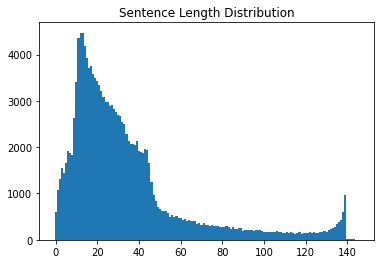

In [7]:
min_len = 999
max_len = 0
sum_len = 0

for sen in train_raw:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(train_raw))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in train_raw:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [8]:
def check_sentence_with_length(raw, length):
    count = 0
    
    for sen in raw:
        if len(sen) == length:
            print(sen)
            count += 1
            if count > 100: return

check_sentence_with_length(train_raw, 1)

아
잼
1
4
4
굿
짱
휴
.
1
굿
음
?
?
ㅎ
굿
ㅋ
굿
즐
♥
굳
ㅋ
네
ㅎ
ㅋ
굿
ㅇ
k
.
굿
굿
굳
ㅠ
?
1
ㅋ
굿
쒯
굿
굿
굳
♬
굿
토
ㅋ
ㅋ
굿
ㅋ
굿
O
똥
ㅎ
.
굿
ㅎ
짱
굳
굿
굿
짱
?
z
굿
짱
음
굳
ㅇ
헐
굳
굳
굿
굿
굿
삼
꽝
굿
굿
굿
굿
ㅎ
굳
굿
4
!
?
ㅎ
1
굳
.
ㅎ
풉
아
굿
똥
ㅅ
왜
ㄴ
굳
쉣
봐
z


In [9]:
for idx, _sum in enumerate(sentence_length):
    # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
    if _sum > 4000:
        print("Outlier Index:", idx+1)

Outlier Index: 12
Outlier Index: 13
Outlier Index: 14
Outlier Index: 15


In [10]:
check_sentence_with_length(train_raw, 12)

아햏햏 아햏햏 아햏햏.
단연 최고라고 할수있지
용가리 진짜짱짱맨이다ㅋ
나름 괜찮은 작품입니다
정말 실망 스러웟음..
무술인이 왜 총을드나?
너무너무 훈훈하네요^^
현실은 꿈, 꿈은 현실
답없네, 뭐하는건지..
엔딩이 넘 슬퍼요 :(
감동감동감동의 도가니탕
정말 최고의 영화...
진짜 짜증나는 영화..
상당히 재밌게 봤습니다
영상미가 역시 최고네요
감독ㅡㅡ다신영화찍지마라
이런 영화가 참 좋다.
정말 광해와 비슷한가?
더빙이 똥이야 ....
잠을 청할 수 있었다.
나오코 진짜 집중안된다
샬라샬라 나오다즁자쥬아
지루하다.. 지루해..
사과해요, 나한테!!!
소재가 굉장히 신선했다
솔직히 산만 하기만했다
OST가 좋은 영화!!
기적은 이미 일어났다.
답을 알려고 하지마라.
평점은 믿지마셈 재밌음
재미 드럽게 없다ㅋㅋㅋ
자식을 그렇게 때리냐?
감동적이였고 좋았습니다
울컥하는 사회현실 ㅠㅠ
등장인물들 모두 짱~~
막장드라마가 따로없구만
말 필요엄따~~~~진정
꿀잼 영화 추억이다ㅜㅜ
맞추자 ㅍ?차븟ㅇㄱ디시
순수하고 아름답다 :)
변태적 성욕 자기합리화
흠....나름 갠찬네요
걍 10점 이라길래..
실력이 필요없는 상황.
감동과 웃음을 한방에!
이거야 이거 ㅋㅋㅋㅋㅋ
성동일딸 시르다...참
평점알바들을 위해 1점
볼만합니다 강추!!ㅋㅋ
이거말고 겨울왕국을봐라
좋은니다..^.,^~~
2.3 (10자 제한)
아무도 안달았네..ㄷㄷ
엉성하고 어설프고...
그냥 보통으로 보았다.
너무 슬픈영화..울음ㅠ
으리는 개뿔 ㅡ,.ㅡ^
처음 본 에로 영화..
평점 조정을 위해...
그냥 쓰레기지 쓰레기~
쵝오네요 최고 대박영화
유전무죄 무전유죄!!!
의외의 꿀잼 이였습니다
어차피 우승은 송민호~
이 때부터가 쓰레기였지
완전 찝찝한 영화...
이상형이 바뀌었습니다.
역시 산드라블록 누님!
결국 엄마가 죽인거네?
그냥 그저 별시리...
추천할만한 경제영화였음
제대로 알아야할 역사임
일본판이더재미있음...
역시 재미있군요 >ㅁ<
아깝다 나의 1점도ㅡㅡ
마음이 따뜻해지는 영화
죽었다. 참 재미없다.

Data Size: 146183
문장의 최단 길이: 1
문장의 최장 길이: 146
문장의 평균 길이: 35


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


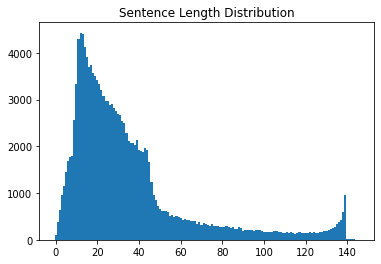

In [14]:
min_len = 999
max_len = 0
sum_len = 0

cleaned_corpus = list(set(train_raw))  # set를 사용해서 중복을 제거합니다.
print("Data Size:", len(cleaned_corpus))

for sen in cleaned_corpus:
    length = len(sen)
    if min_len > length: min_len = length
    if max_len < length: max_len = length
    sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


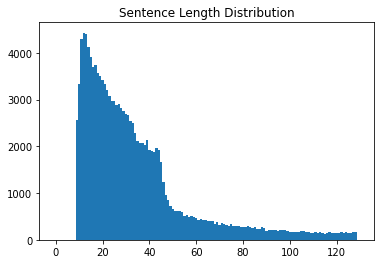

In [17]:
max_len = 130
min_len = 10

# 길이 조건에 맞는 문장만 선택합니다.
filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# 분포도를 다시 그려봅니다.
sentence_length = np.zeros((max_len), dtype=np.int)

for sen in filtered_corpus:
    sentence_length[len(sen)-1] += 1

plt.bar(range(max_len), sentence_length, width=1.0)
plt.title("Sentence Length Distribution")
plt.show()

In [18]:
temp_file = '/content/drive/MyDrive/인공지능/아이펠/GoingDeeper/제출용/data/sp_tokenizer/data/ratings_train.txt.temp'

vocab_size = 8000

with open(temp_file, 'w') as f:
    for row in filtered_corpus:   # 이전 스텝에서 정제했던 corpus를 활용합니다.
        f.write(str(row) + '\n')

spm.SentencePieceTrainer.Train(
    '--input={} --model_prefix=korean_spm --vocab_size={}'.format(temp_file, vocab_size)    
)
#위 Train에서  --model_type = 'unigram'이 디폴트 적용되어 있습니다. --model_type = 'bpe' 로 옵션을 주어 변경할 수 있습니다.



In [19]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다락방에도들어가신다람쥐.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
# enable_size가 True이면 "nbest_size > 1" 또는 "nbest_size = -1"을 지정해야 합니다. 
#'알파'와 '알파'. "nbest_size"는 BPE-드롭아웃에서 무시된 유니그램 모드에서만 활성화됩니다. ' 
# nbest_size = -1"일 때, 이 방법은 격자에 있는 모든 후보로부터 표본을 추출한다. 'nbest 분할의 결과입니다.
print(s.SampleEncodeAsPieces('아버지가방에들어가신다락방에도들어가신다람쥐.',2,0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1449, 9, 396, 15, 1367, 9, 148, 17, 649, 396, 1124, 1367, 9, 148, 17, 2456, 3800, 4]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '락', '방', '에도', '들어', '가', '신', '다', '람', '쥐', '.']
아버지가방에들어가신다락방에도들어가신다람쥐.


In [29]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [30]:
 tensor, word_index, index_word = sp_tokenize(s,list(map(str,train_data['document'])))
 print(tensor)

[[  65  858    5 ...    0    0    0]
 [1754    8 4841 ...    0    0    0]
 [  22  398 7771 ...    0    0    0]
 ...
 [ 149  165   60 ...    0    0    0]
 [1888  648 5010 ...    0    0    0]
 [ 268    7 4214 ...    0    0    0]]


In [26]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

def load_data(train_data, test_data, num_words=10000):
    
    X_train = []
    for sentence in list(map(str,train_data['document'])):
        temp_X, word_index, index_word = sp_tokenize(s,sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_train.append(temp_X)

    X_test = []
    for sentence in list(map(str,test_data['document'])):
        temp_X, word_index, index_word = sp_tokenize(s,sentence) # 토큰화
        temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
        X_test.append(temp_X)
    
    X_train = list(map(word_index, X_train))
    X_test = list(map(word_index, X_test))
        
    return X_train, np.array(list(train_data['label'])), X_test, np.array(list(test_data['label']))
    
X_train, y_train, X_test, y_test, word_to_index = load_data(train_data, test_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  


KeyboardInterrupt: ignored

In [ ]:
train_tensor, train_word_to_index, train_index_to_word = sp_tokenize(s, train_df)
print(train_tensor)

[[   3 7360    0    0    0    0    0]
 [4280  493 1168 1067 2072 5092  541]
 [   3 7209 1392 6646    0    0    0]]


In [ ]:
test_tensor, test_word_to_index, test_index_to_word = sp_tokenize(s, test)
print(test_tensor)

[[   3 7360 4280 ...    0    0    0]
 [  24 1407 2509 ...    0    0    0]
 [   8 2644 2141 ...    0    0    0]
 ...
 [   8 1990 1558 ...    0    0    0]
 [  27 1379 1757 ...    0    0    0]
 [  24 1369 2307 ...    0    0    0]]


In [ ]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(train_tensor,
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=20)

X_test = tf.keras.preprocessing.sequence.pad_sequences(test_tensor,
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=20)

In [ ]:
# min_len = 999
# max_len = 0
# sum_len = 0

# for sen in raw:
#     length = len(sen)
#     if min_len > length: min_len = length
#     if max_len < length: max_len = length
#     sum_len += length

# print("문장의 최단 길이:", min_len)
# print("문장의 최장 길이:", max_len)
# print("문장의 평균 길이:", sum_len // len(raw))

# sentence_length = np.zeros((max_len), dtype=np.int)

# for sen in raw:
#     sentence_length[len(sen)-1] += 1

# plt.bar(range(max_len), sentence_length, width=1.0)
# plt.title("Sentence Length Distribution")
# plt.show()

In [ ]:
# def check_sentence_with_length(raw, length):
#     count = 0
    
#     for sen in raw:
#         if len(sen) == length:
#             print(sen)
#             count += 1
#             if count > 100: return

# check_sentence_with_length(raw, 1)

In [ ]:
# for idx, _sum in enumerate(sentence_length):
#     # 문장의 수가 1500을 초과하는 문장 길이를 추출합니다.
#     if _sum > 5000:
#         print("Outlier Index:", idx+1)

Outlier Index: 22
Outlier Index: 23
Outlier Index: 24
Outlier Index: 25
Outlier Index: 26
Outlier Index: 27
Outlier Index: 28


In [ ]:
# check_sentence_with_length(raw, 11)

7477618	굿	1
5458245	핡	1
3946738	굿	1
7910238	휴	1
6924850	굿	1
7804013	ㅋ	1
5666738	ㅇ	1
3003689	굿	1
7830757	‥	1
6876426	O	1
773168	수작	1
3867260	굿	1
7250157	굿	1
7403577	갑	1
7505484	ㅎ	1
7483267	굿	1
7281794	.	1
117697	맞아	1
7225800	올	1
7721830	굿	1
7684134	헷	1
971290	명작	1
1426659	g	1
8012399	굿	1
261233	오우	1
7499560	♥	1
7764304	.	1
4483055	짱	1
4321484	짱	1
7317454	ㅆ	1
7863935	.	1
7723058	굿	1
7125585	짱	1
6813098	굿	1
7236009	.	1
4746939	굿	1
6297864	굿	1
7523848	굿	1
100226	gg	1
7083655	.	1
3891011	짱	1
7489303	굳	1
7436370	굿	1
5967897	잼	1
7903489	굿	1
3339077	짱	1
283968	후훗	1
3774728	굿	1
3382434	굿	1
7927389	ㅎ	1
6556188	굿	1
150372	나두	1
7677681	굿	1
1815836	굿	1
5277532	ㅁ	1
632718	^^	1
7264736	굳	1
6365131	굿	1
5978698	굿	1
6959675	?	1
7863562	ㅎ	1
3945553	굿	1
4319568	굿	1
7221937	.	1
7945393	짱	1
4493033	ㅇ	1
7330348	ㅋ	1
4016750	애	1
7143066	ㅋ	1
1447283	굿	1
7338439	?	1
79940	^-^	1
7284441	짱	1
7734153	.	1
7104728	흠	1
1403313	굿	1
7474858	ㅋ	1
7533249	찜	1
565434	조앙	1
453949	멋져	1
6898989	b	1
7516020	굿	1
6805929	굳	1
7172

Data Size: 200001
문장의 최단 길이: 8
문장의 최장 길이: 156
문장의 평균 길이: 45


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


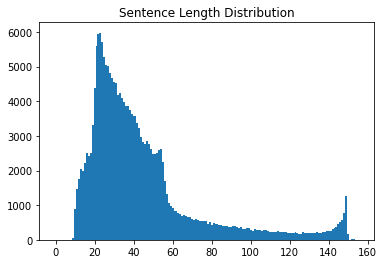

In [ ]:
# min_len = 999
# max_len = 0
# sum_len = 0

# cleaned_corpus = list(set(raw))  # set를 사용해서 중복을 제거합니다.
# print("Data Size:", len(cleaned_corpus))

# for sen in cleaned_corpus:
#     length = len(sen)
#     if min_len > length: min_len = length
#     if max_len < length: max_len = length
#     sum_len += length

# print("문장의 최단 길이:", min_len)
# print("문장의 최장 길이:", max_len)
# print("문장의 평균 길이:", sum_len // len(cleaned_corpus))

# sentence_length = np.zeros((max_len), dtype=np.int)

# for sen in cleaned_corpus:   # 중복이 제거된 코퍼스 기준
#     sentence_length[len(sen)-1] += 1

# plt.bar(range(max_len), sentence_length, width=1.0)
# plt.title("Sentence Length Distribution")
# plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


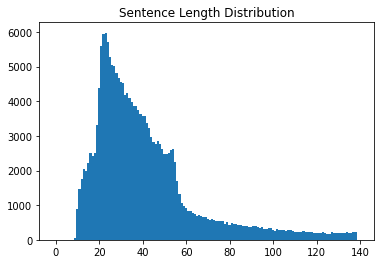

In [ ]:
# max_len = 140
# min_len = 10

# # 길이 조건에 맞는 문장만 선택합니다.
# filtered_corpus = [s for s in cleaned_corpus if (len(s) < max_len) & (len(s) >= min_len)]

# # 분포도를 다시 그려봅니다.
# sentence_length = np.zeros((max_len), dtype=np.int)

# for sen in filtered_corpus:
#     sentence_length[len(sen)-1] += 1

# plt.bar(range(max_len), sentence_length, width=1.0)
# plt.title("Sentence Length Distribution")
# plt.show()

## 4.SentencePiece 모델 학습

## 5. Tokenizer 함수 작성

In [ ]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({word:idx})
        index_word.update({idx:word})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [ ]:
test_index_to_word

{0: '<unk>',
 1: '<s>',
 2: '</s>',
 3: '▁',
 4: '▁1',
 5: '▁0',
 6: '.',
 7: '▁9',
 8: '..',
 9: '이',
 10: '▁영화',
 11: '▁8',
 12: '...',
 13: '의',
 14: '가',
 15: '도',
 16: '는',
 17: '▁7',
 18: ',',
 19: '을',
 20: '에',
 21: '▁6',
 22: '다',
 23: '▁5',
 24: '은',
 25: '고',
 26: '▁10',
 27: '지',
 28: '?',
 29: '▁3',
 30: '한',
 31: '▁4',
 32: '▁2',
 33: '▁너무',
 34: '!',
 35: '를',
 36: '만',
 37: '▁이',
 38: '▁정말',
 39: '로',
 40: '게',
 41: '나',
 42: '영화',
 43: '▁진짜',
 44: '~',
 45: '과',
 46: '어',
 47: '리',
 48: '라',
 49: '기',
 50: '아',
 51: '네',
 52: '인',
 53: '하고',
 54: '점',
 55: '▁안',
 56: '으로',
 57: '▁잘',
 58: '에서',
 59: '서',
 60: '....',
 61: '요',
 62: '▁그',
 63: '들',
 64: '!!',
 65: '▁왜',
 66: '네요',
 67: '와',
 68: '▁아',
 69: '▁다',
 70: '▁더',
 71: '해',
 72: '자',
 73: '▁이런',
 74: '스',
 75: '하는',
 76: '▁수',
 77: '음',
 78: '거',
 79: '▁본',
 80: '면',
 81: '▁그냥',
 82: '수',
 83: '▁드라마',
 84: '대',
 85: '하',
 86: '지만',
 87: '함',
 88: '야',
 89: '시',
 90: '니',
 91: '사',
 92: '▁보고',
 93: '▁한',
 94: '▁

In [ ]:
word_index

{'<unk>': 0,
 '<s>': 1,
 '</s>': 2,
 '▁': 3,
 '▁1': 4,
 '▁0': 5,
 '.': 6,
 '▁9': 7,
 '..': 8,
 '이': 9,
 '▁영화': 10,
 '▁8': 11,
 '...': 12,
 '의': 13,
 '가': 14,
 '도': 15,
 '는': 16,
 '▁7': 17,
 ',': 18,
 '을': 19,
 '에': 20,
 '▁6': 21,
 '다': 22,
 '▁5': 23,
 '은': 24,
 '고': 25,
 '▁10': 26,
 '지': 27,
 '?': 28,
 '▁3': 29,
 '한': 30,
 '▁4': 31,
 '▁2': 32,
 '▁너무': 33,
 '!': 34,
 '를': 35,
 '만': 36,
 '▁이': 37,
 '▁정말': 38,
 '로': 39,
 '게': 40,
 '나': 41,
 '영화': 42,
 '▁진짜': 43,
 '~': 44,
 '과': 45,
 '어': 46,
 '리': 47,
 '라': 48,
 '기': 49,
 '아': 50,
 '네': 51,
 '인': 52,
 '하고': 53,
 '점': 54,
 '▁안': 55,
 '으로': 56,
 '▁잘': 57,
 '에서': 58,
 '서': 59,
 '....': 60,
 '요': 61,
 '▁그': 62,
 '들': 63,
 '!!': 64,
 '▁왜': 65,
 '네요': 66,
 '와': 67,
 '▁아': 68,
 '▁다': 69,
 '▁더': 70,
 '해': 71,
 '자': 72,
 '▁이런': 73,
 '스': 74,
 '하는': 75,
 '▁수': 76,
 '음': 77,
 '거': 78,
 '▁본': 79,
 '면': 80,
 '▁그냥': 81,
 '수': 82,
 '▁드라마': 83,
 '대': 84,
 '하': 85,
 '지만': 86,
 '함': 87,
 '야': 88,
 '시': 89,
 '니': 90,
 '사': 91,
 '▁보고': 92,
 '▁한': 93,
 '▁내': 

In [ ]:
X_train = tf.keras.preprocessing.sequence.pad_sequences(train_tensor,
                                                        padding='post', # 혹은 'pre'
                                                        maxlen=max_len)

X_test = tf.keras.preprocessing.sequence.pad_sequences(test_tensor,
                                                       padding='post', # 혹은 'pre'
                                                       maxlen=max_len)


In [ ]:

print(X_train.shape)
print(X_test.shape)

(194448, 140)
(50001, 140)


## 6. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해 보기

네이버 영화리뷰 감정 분석 태스크가 있습니다. 한국어로 된 corpus를 다루어야 하므로 주로 KoNLPy에서 제공하는 형태소 분석기를 사용하여 텍스트를 전처리해서 RNN 모델을 분류기로 사용하게 되는데요.

만약 이 문제에서 tokenizer를 SentencePiece로 바꾸어 다시 풀어본다면 더 성능이 좋아질까요? KoNLPy에 있는 Mecab, kkma, Okt 등과 비교해보세요.

- 네이버 영화리뷰 감정 분석 코퍼스에 SentencePiece를 적용시킨 모델 학습하기
- 학습된 모델로 sp_tokenize() 메소드 구현하기
- 구현된 토크나이저를 적용하여 네이버 영화리뷰 감정 분석 모델을 재학습하기
- KoNLPy 형태소 분석기를 사용한 모델과 성능 비교하기
- SentencePiece 모델의 model_type, vocab_size 등을 변경해 가면서 성능 개선 여부 확인하기

Word Vector는 활용할 필요가 없습니다. 활용이 가능하지도 않을 것입니다.

중복제거 넘 값 제거

In [ ]:
vocab_size = 10000  # 어휘 사전의 크기입니다(10개의 단어)
word_vector_dim = 20  # 단어 하나를 표현하는 임베딩 벡터의 차원수입니다. 

model_lstm = tf.keras.Sequential()
model_lstm.add(tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_lstm.add(tf.keras.layers.LSTM(8))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model_lstm.add(tf.keras.layers.Dense(8, activation='relu'))
model_lstm.add(tf.keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model_lstm.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 20)          200000    
                                                                 
 lstm_2 (LSTM)               (None, 8)                 928       
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 201,009
Trainable params: 201,009
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train

array([[  17, 1346, 2118, ...,    0,    0,    0],
       [  11, 2064, 1836, ...,    0,    0,    0],
       [   7, 1189, 1964, ...,    0,    0,    0],
       ...,
       [  17, 2155, 1599, ...,    0,    0,    0],
       [  21, 1909, 1908, ...,    0,    0,    0],
       [   4, 2076, 2493, ...,    0,    0,    0]], dtype=int32)

In [ ]:
model_lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              
epochs=20  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history_lstm = model_lstm.fit(X_train,
                    epochs=epochs,
                    batch_size=512,
                    verbose=1)

Epoch 1/20


ValueError: ignored